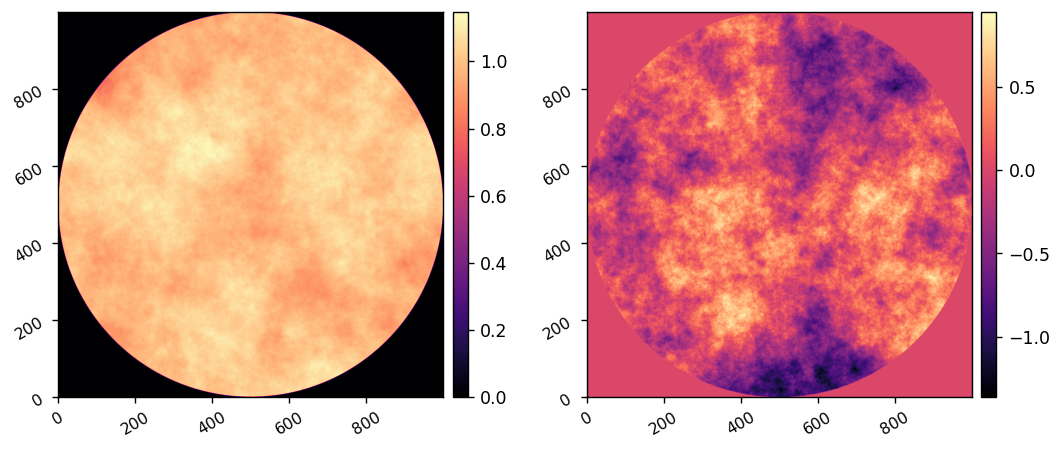

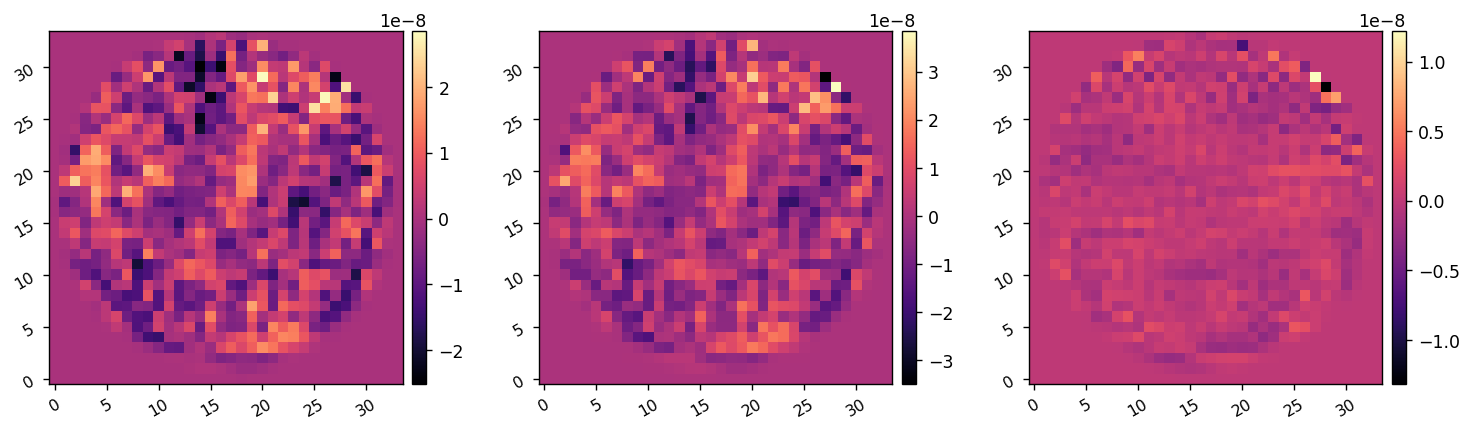

In [1]:
import numpy as np
import astropy.units as u
from datetime import datetime
today = int(datetime.today().strftime('%Y%m%d'))
from importlib import reload
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

from scoobpsf.math_module import xp, _scipy, ensure_np_array
from scoobpsf.imshows import imshow1, imshow2, imshow3
import scoobpsf.scoob_fraunhofer as scoob
import scoobpsf.utils as utils
import scoobpsf.dm as dm

import lina

wavelength_c = 633*u.nm
pupil_diam = 10*u.mm

reload(utils)
wfe_amp = utils.load_fits('example_wfe_amp.fits')
wfe_phs = utils.load_fits('example_wfe_phs.fits')
WFE = wfe_amp * xp.exp(1j*wfe_phs)
imshow2(wfe_amp, wfe_phs)

dh_commands = utils.load_fits('scoob_fraunhofer_dh_commands_0.fits')
dh_commands = xp.array([xp.zeros((34,34)), xp.zeros((34,34)), dh_commands[6], dh_commands[12], dh_commands[-1]])
imshow3(dh_commands[2], dh_commands[-1], dh_commands[2]-dh_commands[-1])

Oversampling > 2x suggested for reliable results in Fresnel propagation.


(1000, 1000)
(2048, 2048)
(3000, 3000)


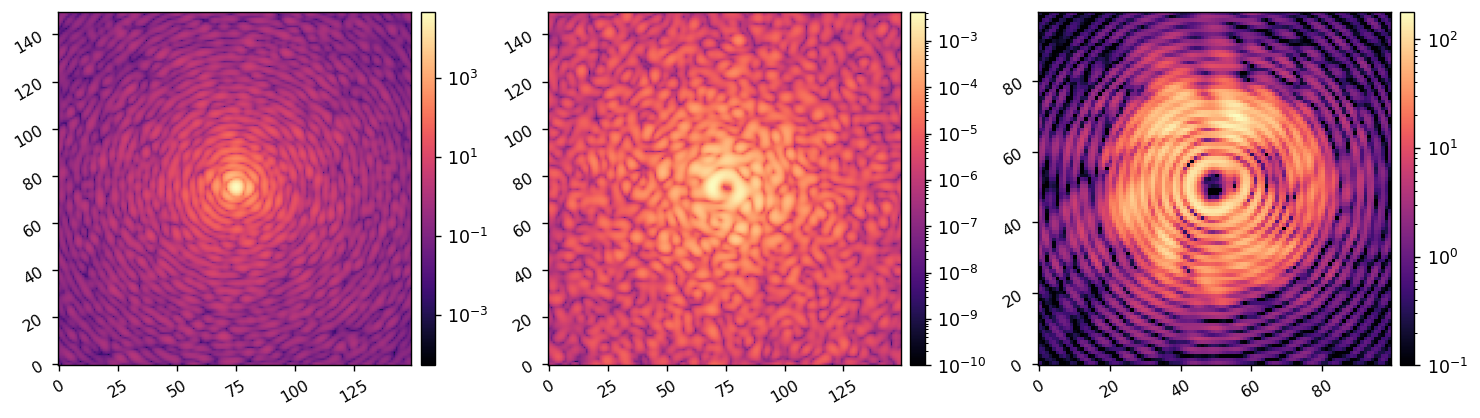

In [2]:
import copy
reload(scoob)
M = scoob.single()
M.setattr('WFE', WFE)
M.setattr('llowfsc_defocus', 2.75*u.mm)
M.setattr('nlocam', 100)
# M.set_dm(dh_commands[-1])

M.setattr('use_vortex', False)
ref_psf = M.snap()

M.setattr('Imax_ref', xp.max(ref_psf))
M.setattr('use_vortex', True)
coro_im = M.snap()

locam_ref_im = M.snap_locam()

coro_roi = lina.utils.create_annular_focal_plane_mask(M.npsf, M.psf_pixelscale_lamDc, 3, 12, edge=3, )
imshow3(ref_psf, coro_im, locam_ref_im, lognorm=True, vmin2=1e-10, vmin3=1e-1)

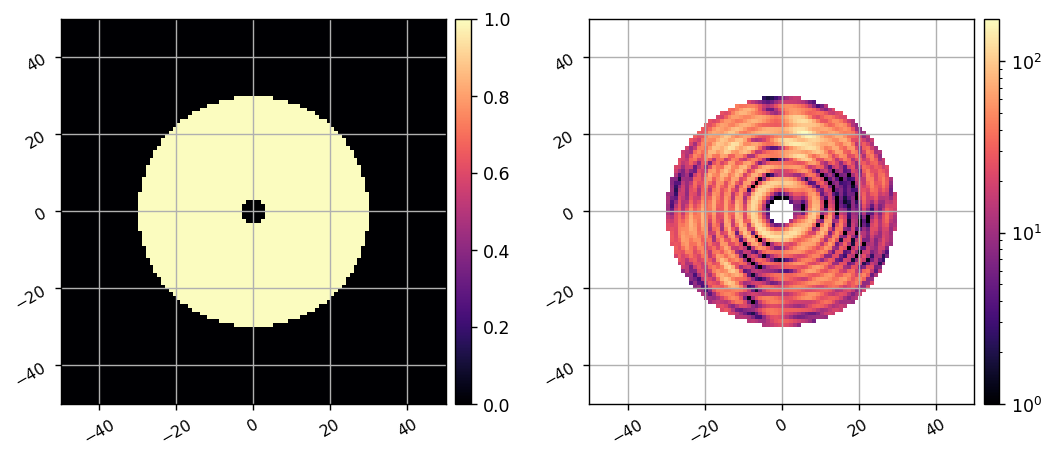

In [3]:
irad = 3
orad = 30
control_mask = lina.utils.create_annular_focal_plane_mask(M.nlocam, 1, irad, orad, edge=None, )
# control_mask = xp.ones((M.nlocam, M.nlocam)).astype(bool)
imshow2(control_mask, locam_ref_im * control_mask, grid=True, pxscl=1, lognorm2=True, vmin2=10e-1)

(3000, 3000)


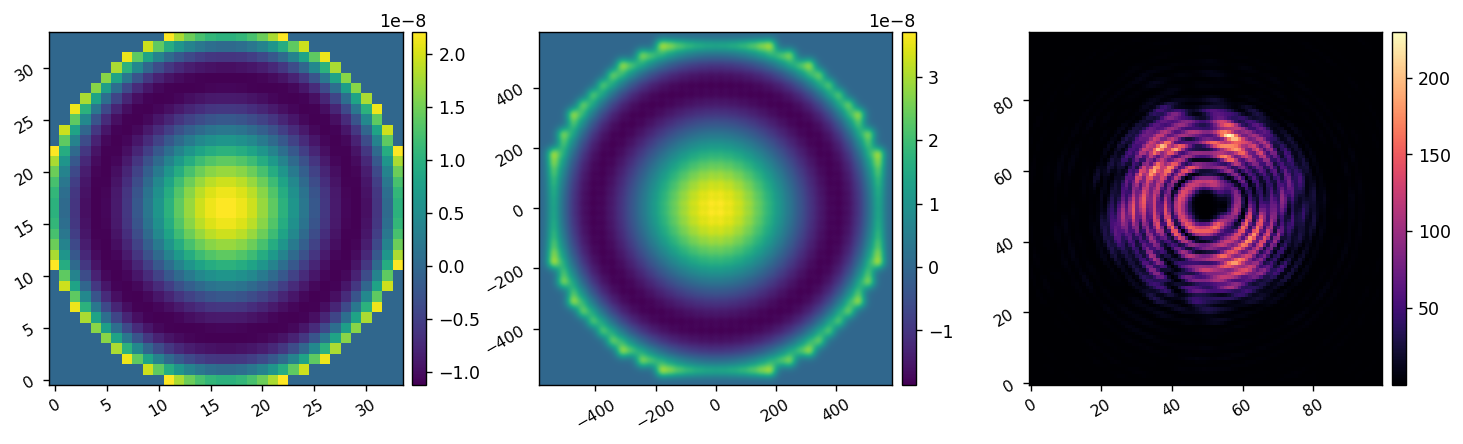

In [4]:
reload(lina.utils)
M.zero_dm()
dm_modes = lina.utils.create_zernike_modes(M.dm_mask, nmodes=10, remove_modes=1)
i = -1
amp = 10e-9
M.add_dm(amp*dm_modes[i])
locam_im = M.snap_locam()
imshow3(amp*dm_modes[i], M.DM.get_surface(), locam_im, cmap1='viridis', cmap2='viridis', pxscl2=1)

(3000, 3000)
(3000, 3000)


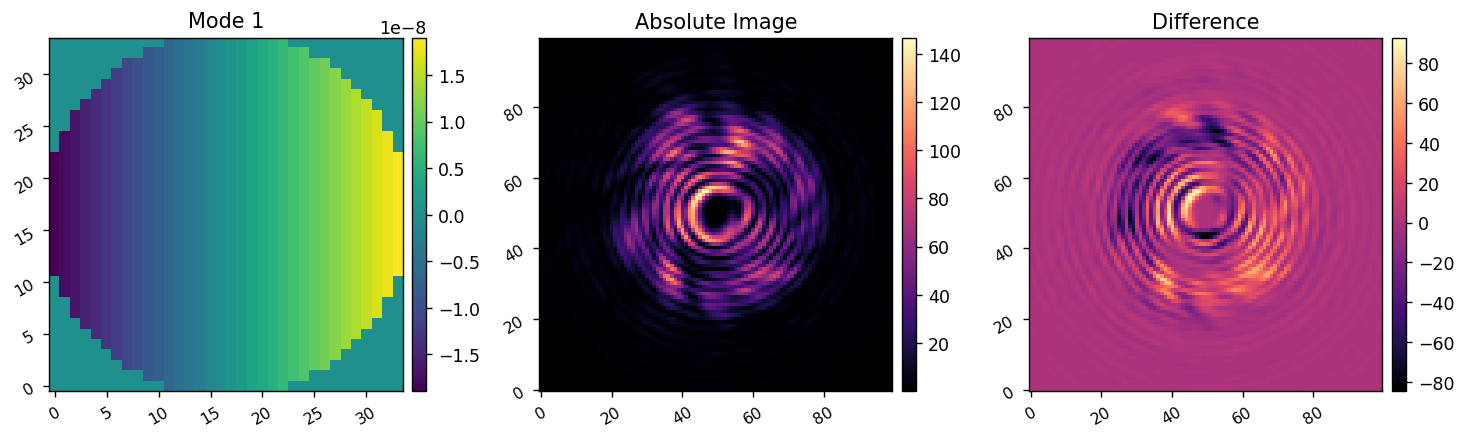

(3000, 3000)
(3000, 3000)


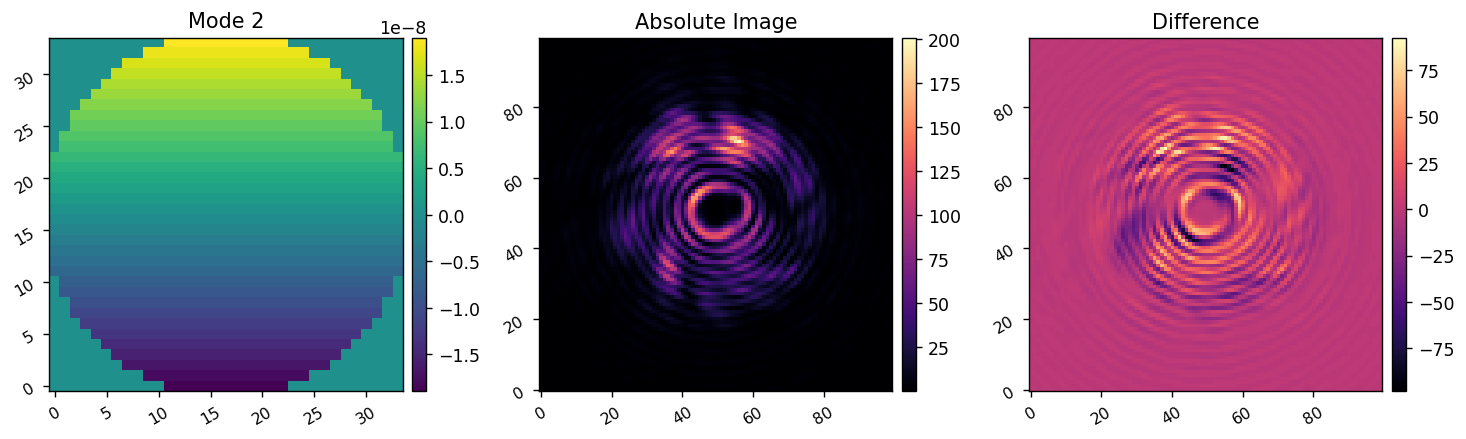

(3000, 3000)
(3000, 3000)


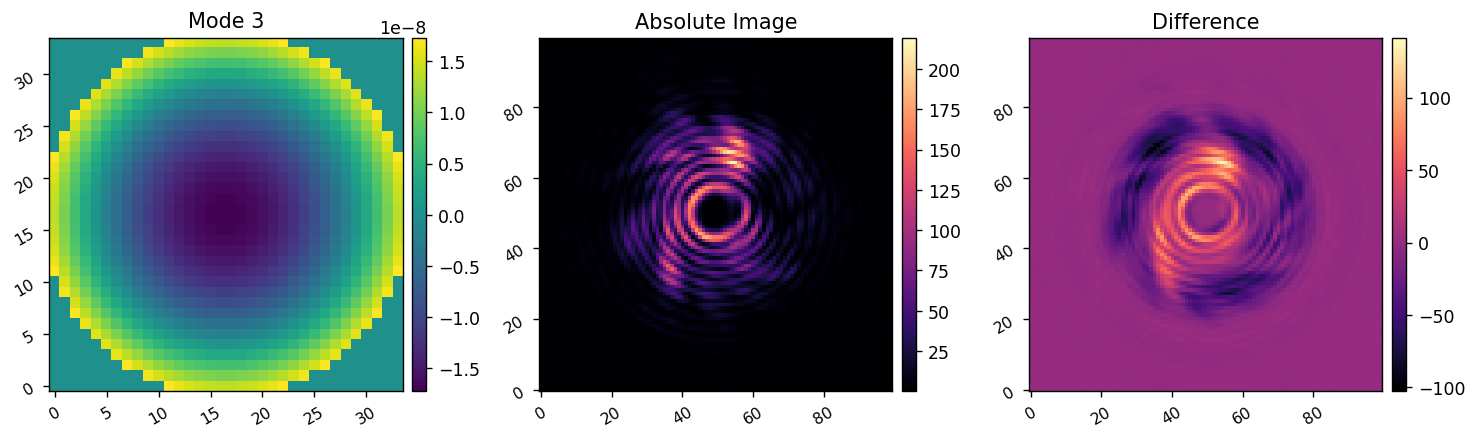

(3000, 3000)
(3000, 3000)


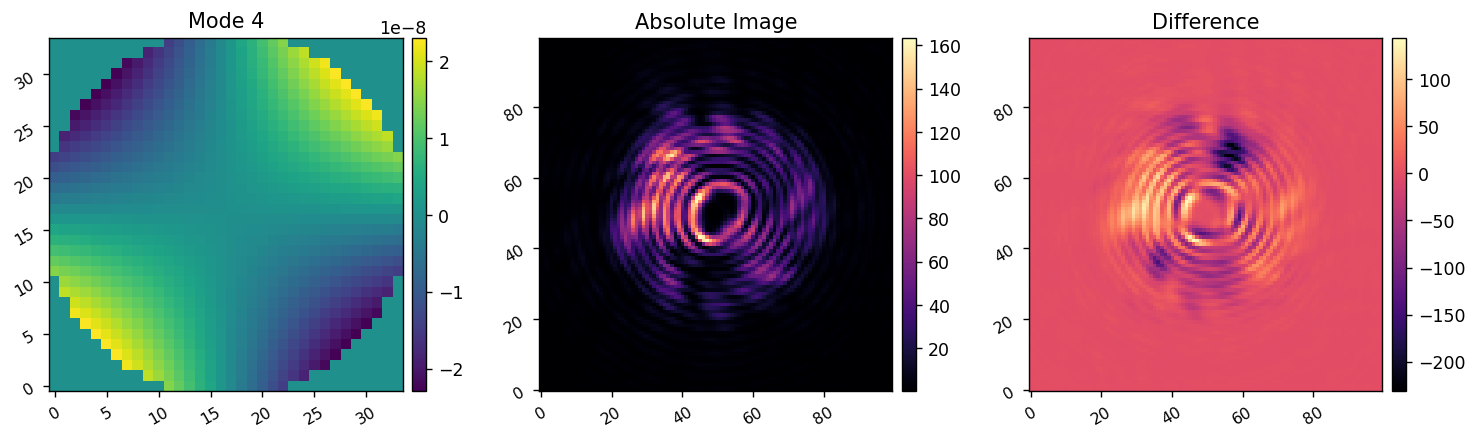

(3000, 3000)
(3000, 3000)


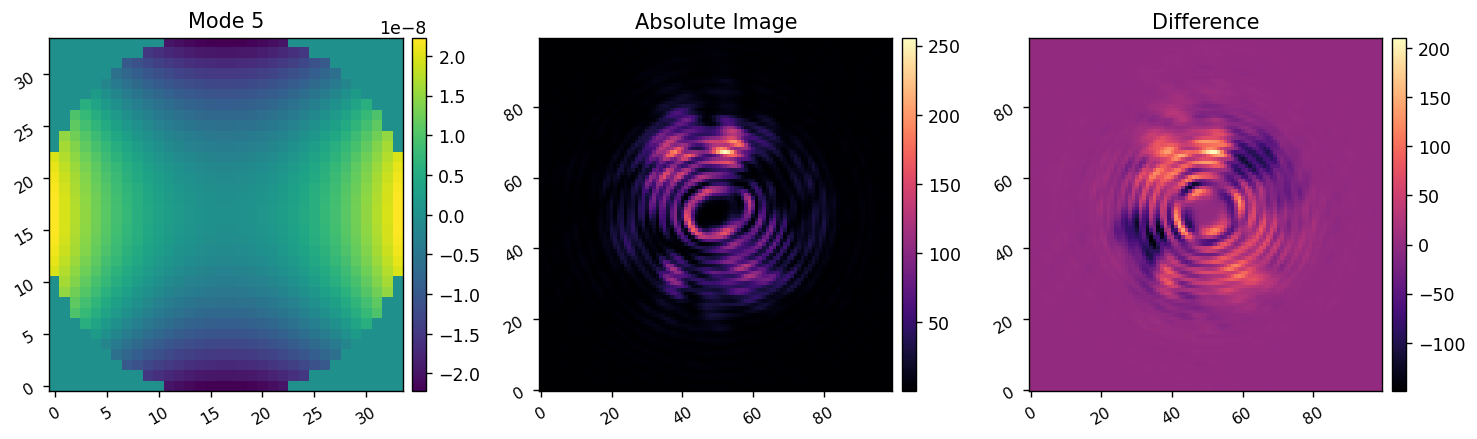

(3000, 3000)
(3000, 3000)


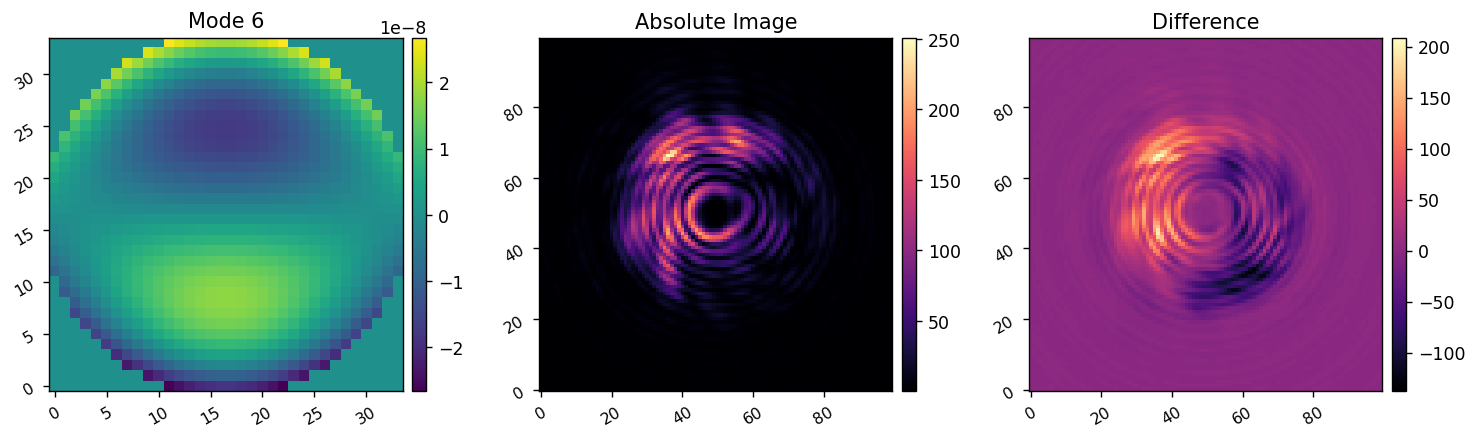

(3000, 3000)
(3000, 3000)


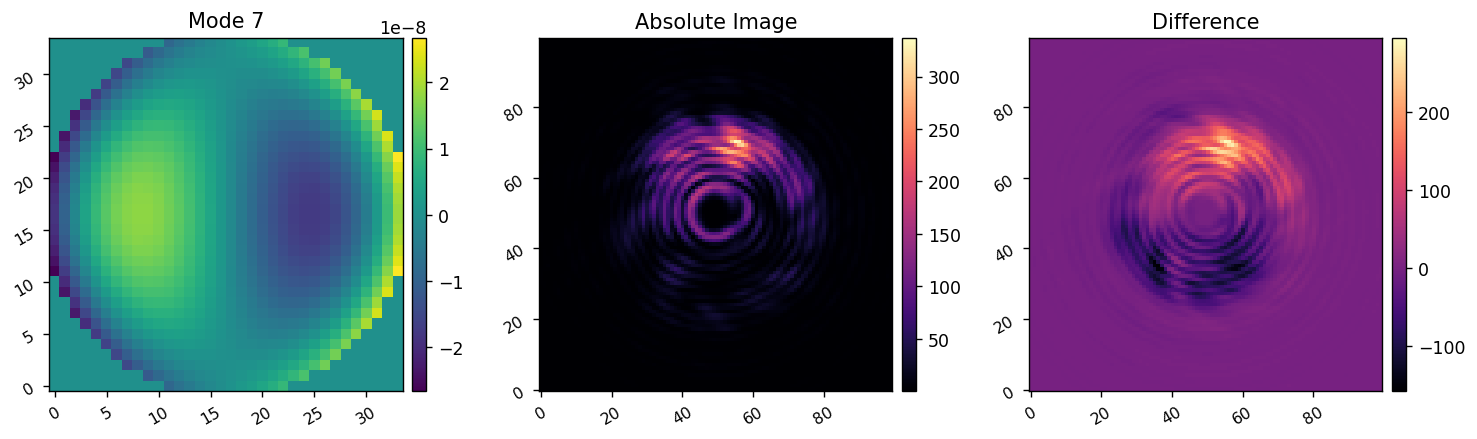

(3000, 3000)
(3000, 3000)


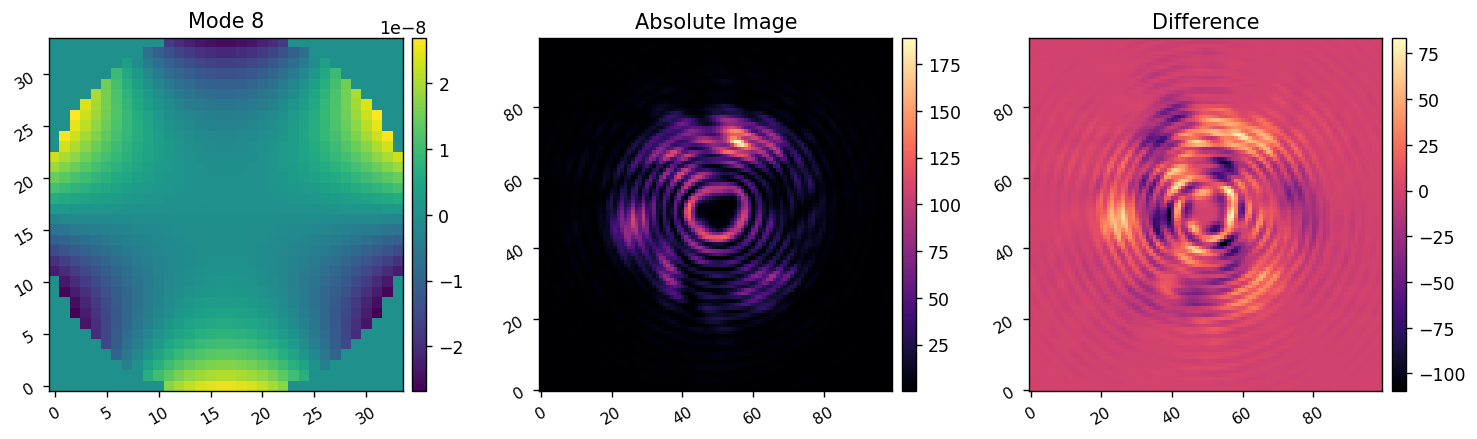

(3000, 3000)
(3000, 3000)


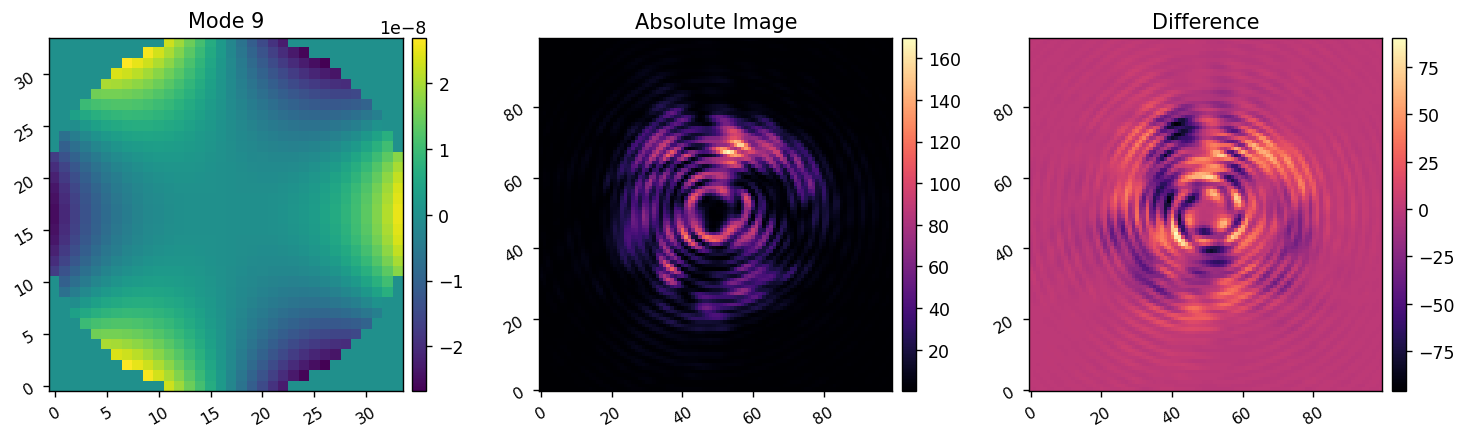

(3000, 3000)
(3000, 3000)


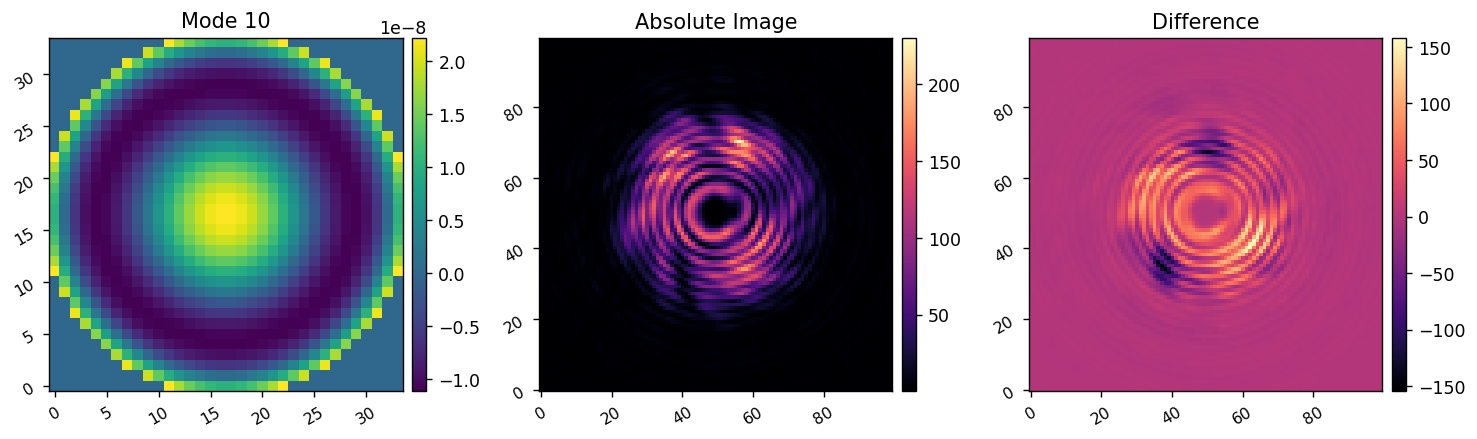

In [60]:
reload(lina.llowfsc)
M.setattr('WFE', WFE)
M.zero_dm()
# M.set_dm(dhc)
M.setattr('use_vortex', True)
zer_rm = lina.llowfsc.calibrate_without_fsm(M, control_mask, dm_modes=dm_modes, amps=10e-9, plot=True)

In [57]:
U, s, Vt = xp.linalg.svd(zer_rm, full_matrices=False)
s.max()/s.min()

array(3.16520385)

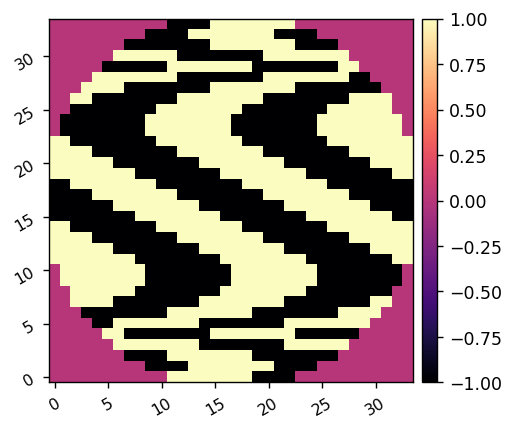

In [11]:
had_modes = lina.utils.create_hadamard_modes(M.dm_mask)
imshow1(had_modes[8])

In [12]:
reload(lina.llowfsc)
M.zero_dm()
M.setattr('use_vortex', True)

had_rm = lina.llowfsc.calibrate_without_fsm(M, control_mask,  dm_modes=had_modes, amps=10e-9, plot=0)


(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)
(3000, 3000)

In [46]:
U, s, Vt = xp.linalg.svd(had_rm, full_matrices=False)
s.max()/s.min()

array(407733.37497992)

116.35528356555025 nm


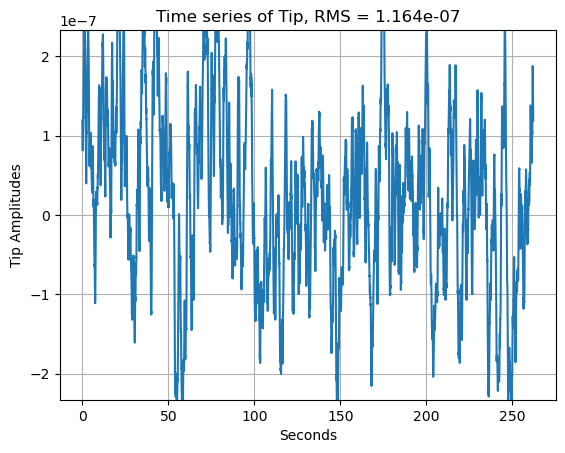

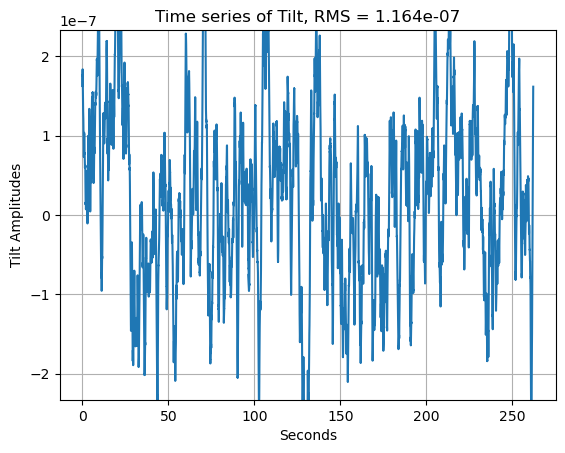

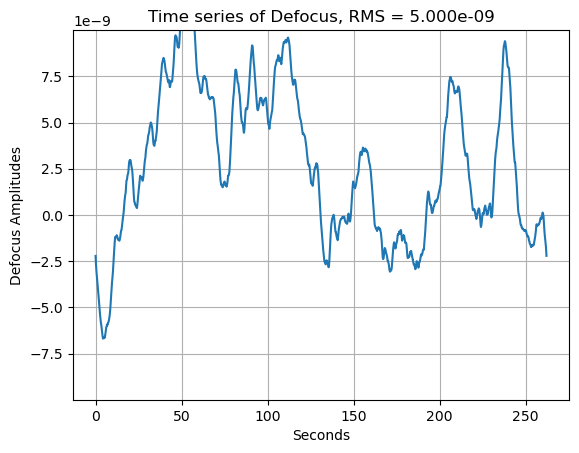

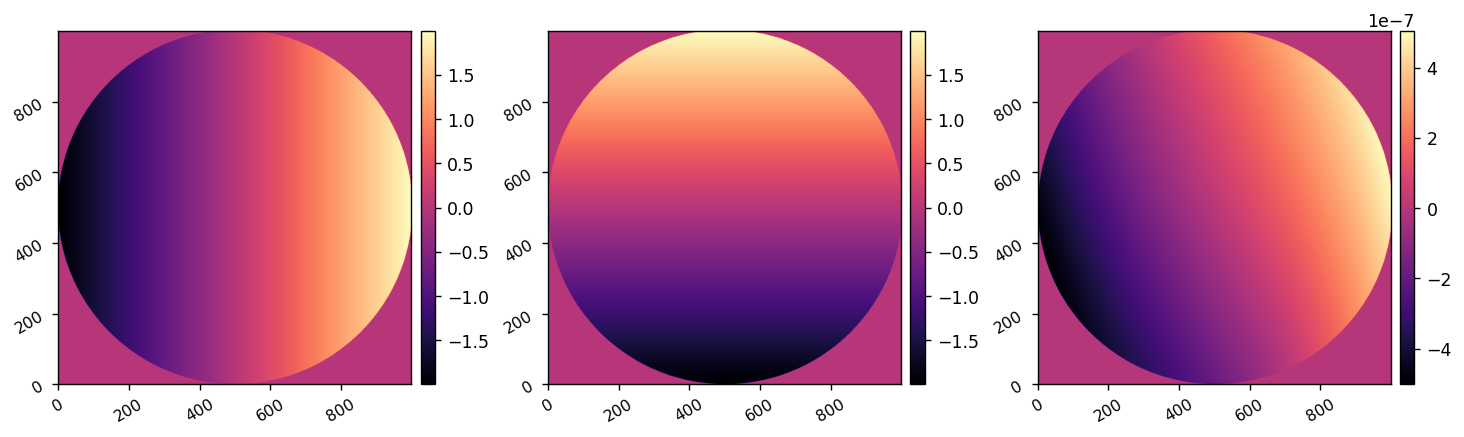

In [61]:
import lina.psds as psds
reload(psds)

total_pupil_diam = 2.4*u.m
jitter = 40*u.mas

mag = (total_pupil_diam / M.dm_beam_diam).decompose().value
jitter_at_dm = mag*jitter
tt_pv_to_rms = 1/4
tt_at_pupil_pv = np.tan(jitter_at_dm).value * M.dm_beam_diam
tt_at_pupil_rms = tt_at_pupil_pv * tt_pv_to_rms
print(tt_at_pupil_rms.to(u.nm))

fmax = 1000*u.Hz
tmax = 10*u.s
# wfe_modes_rms = np.array([tt_at_pupil_rms.to_value(u.m)] * 2)
wfe_modes_rms = np.array(2*[tt_at_pupil_rms.to_value(u.m)] + 8*[5e-9])
knee_freqs = np.array([0.3]*2 + [0.03]*8) * u.Hz

N_wfe_modes = len(wfe_modes_rms)
wfe_modes = lina.utils.create_zernike_modes(M.APMASK, nmodes=N_wfe_modes, remove_modes=1)

freqs, times = psds.generate_freqs(Nf=2**18+1, f_max=fmax)

wfe_time_series = xp.zeros((N_wfe_modes+1, len(times)))
wfe_time_series[0] = xp.array(times)
slope = 4
for i in range(N_wfe_modes):
    f_knee = knee_freqs[i]
    psd = psds.kneePSD(freqs, 1, f_knee.to_value(u.Hz), slope)
    coeff = psds.generate_time_series(psd, fmax, rms=1, seed=123+i)
    wfe_time_series[i+1] = wfe_modes_rms[i] * xp.array(coeff)

# resample the time series such that the spacing steps are 2ms to simulate LLOWFSC at 500Hz
# and limit the maximum time to the desired t_max
wfe_time_series = wfe_time_series[:, ::4]
times = wfe_time_series[0]
# wfe_time_series = wfe_time_series[:, times<tmax.to_value(u.s)]

times = wfe_time_series[0]
tip = wfe_time_series[1]
tilt = wfe_time_series[2]
defocus = wfe_time_series[3]

psds.plot_time_series(times, tip, name='Tip')
psds.plot_time_series(times, tilt, name='Tilt')
psds.plot_time_series(times, defocus, name='Defocus')

lo_wfe = xp.sum( wfe_time_series[1:, 500, None, None] * wfe_modes, axis=0)
imshow3(wfe_modes[0], wfe_modes[1], lo_wfe)

(3000, 3000)


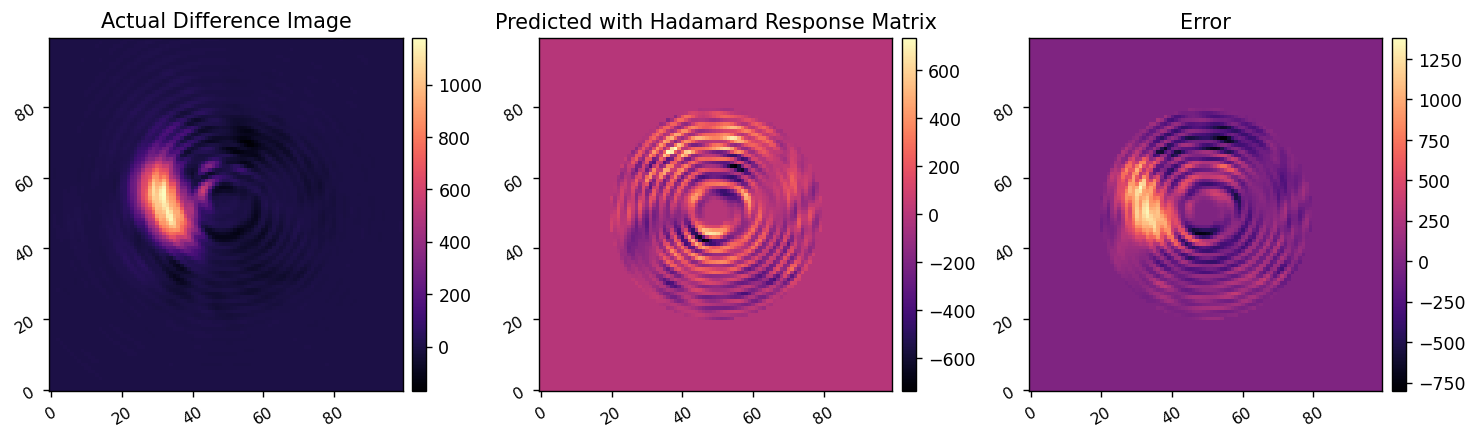

In [62]:
dm_modal_matrix_had = had_modes[:, M.dm_mask]

M.setattr('WFE', WFE)
M.set_dm(dh_commands[-1])
del_ref_im_0 = M.snap_locam() - locam_ref_im
del_ref_im_had = xp.zeros_like(locam_ref_im)
del_ref_im_had[control_mask] = had_rm.dot(dm_modal_matrix_had.dot(dh_commands[-1][M.dm_mask])/1024)
double_diff = control_mask*del_ref_im_0-del_ref_im_had
imshow3(del_ref_im_0, del_ref_im_had, double_diff, 
        'Actual Difference Image', 'Predicted with Hadamard Response Matrix', 'Error')

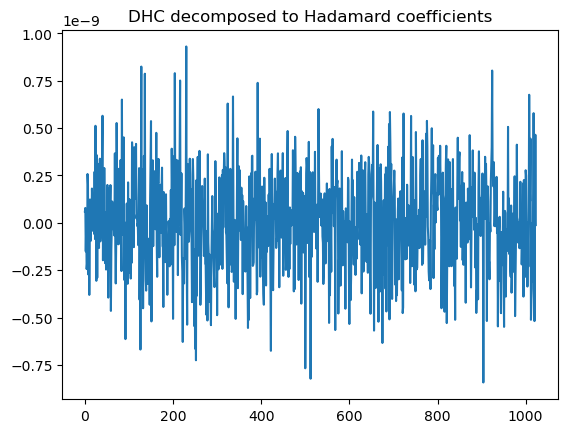

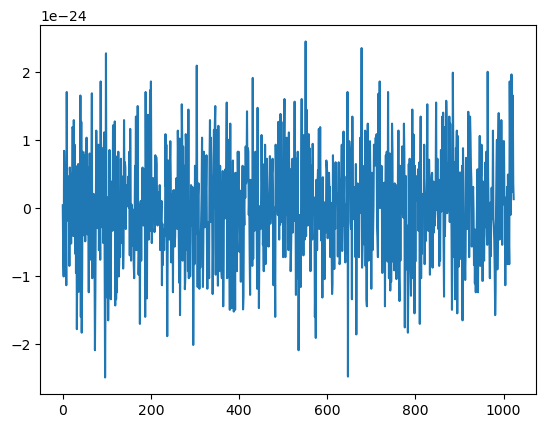

In [51]:
had_coeff = lina.utils.lstsq(had_modes, dh_commands[-1])
had_coeff_2 = dm_modal_matrix_had.dot(dh_commands[-1][M.dm_mask]) /1024
plt.plot(had_coeff.get())
plt.title('DHC decomposed to Hadamard coefficients')
plt.show()
plt.plot(had_coeff.get() - had_coeff_2.get())
plt.show()

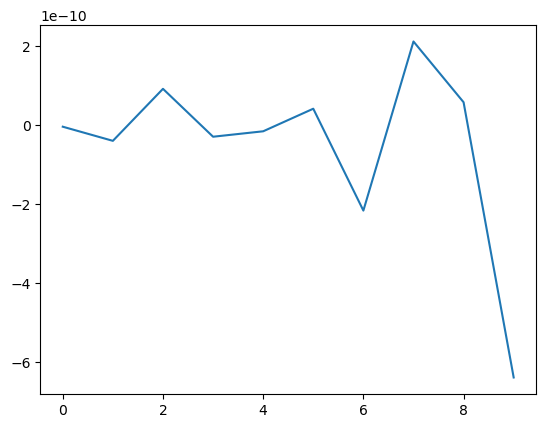

In [22]:
control_matrix = lina.utils.TikhonovInverse(zer_rm, 0)

coeff = control_matrix.dot(double_diff[control_mask])
plt.plot(coeff.get())

In [52]:
reload(lina.llowfsc)

M.set_dm(dh_commands[-1])
del_ref_im_had = xp.zeros_like(locam_ref_im)
del_ref_im_had[control_mask] = had_rm.dot(dm_modal_matrix_had.dot(dh_commands[-1][M.dm_mask])/1024)

control_matrix = lina.utils.TikhonovInverse(zer_rm, 0)

gains = xp.array(2*[0.5] + 8*[0])

llowfsc_dict_1 = lina.llowfsc.run_sim(M, 
                                        WFE,
                                        # locam_ref_im, 
                                        locam_ref_im+del_ref_im_had, 
                                        control_mask, 
                                        control_matrix, 
                                        wfe_time_series[:,:51], 
                                        # wfe_time_series[:,2000:2000+20], 
                                        # wfe_time_series, 
                                        wfe_modes, 
                                        dm_modes=dm_modes, 
                                        gain=gains,  
                                        plot=True, 
                                        # plot_all=True,
                                        # return_coro_ims=True,
                                        )

gains = xp.array(2*[0.5] + 8*[0.2])

llowfsc_dict_2 = lina.llowfsc.run_sim(M, 
                                        WFE,
                                        # locam_ref_im, 
                                        locam_ref_im+del_ref_im_had, 
                                        control_mask, 
                                        control_matrix, 
                                        wfe_time_series[:,50:201], 
                                        # wfe_time_series[:,2000:2000+20], 
                                        # wfe_time_series, 
                                        wfe_modes, 
                                        dm_modes=dm_modes, 
                                        gain=gains,  
                                        plot=True, 
                                        # plot_all=True,
                                        # return_coro_ims=True,
                                        )

(3000, 3000)
(2048, 2048)
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/kianmilani/miniconda3/envs/gpu311env/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_280316/2447805818.py", line 11, in <module>
    llowfsc_dict_1 = lina.llowfsc.run_sim(M,
                    ^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/kianmilani/Projects/lina/lina/llowfsc.py", line 325, in run_sim
    imshow3(locam_im, del_im, coro_im,
  File "/home/kianmilani/Projects/lina/lina/imshows.py", line 286, in imshow3
    if display_fig: display(fig)
                    ^^^^^^^^^^^^
  File "/home/kianmilani/miniconda3/envs/gpu311env/lib/python3.11/site-packages/IPython/core/display_functions.py", line 298, in display
    format_dict, md_dict = format(obj, include=include, exclude=exclude)
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/kianmilani/miniconda3/envs/gpu311env/lib/python3.11/site-pa

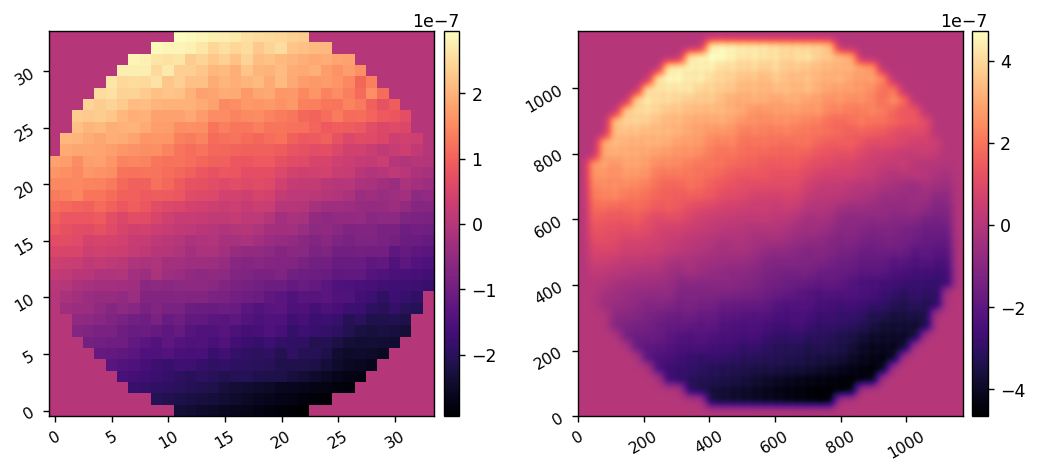

In [53]:
imshow2(M.get_dm(), M.DM.get_surface())

In [35]:
reload(lina.llowfsc)

Nitr = 20

M.zero_dm()
M.setattr('WFE', WFE)

control_matrix = lina.utils.TikhonovInverse(zer_rm, 0)

gains_seq = [
    xp.array(2*[0.5] + 8*[0]),
    xp.array(2*[0.5] + 3*[0.1] + 5*[0.0]),
    xp.array(2*[0.5] + 3*[0.1] + 5*[0.05]),
    xp.array(2*[0.5] + 3*[0.1] + 5*[0.05]),
    xp.array(2*[0.5] + 3*[0.1] + 5*[0.05]),
]

old_dhc = xp.zeros((M.Nact,M.Nact))
for i in range(dh_commands.shape[0]):
    dhc = dh_commands[i]
    M.add_dm(dhc-old_dhc)
    del_ref_im_had = xp.zeros_like(locam_ref_im)
    del_ref_im_had[control_mask] = had_rm.dot(dm_modal_matrix_had.dot(dhc[M.dm_mask])/1024)
    gains = gains_seq[i]

    start_ind = i*Nitr
    end_ind = (i+1)*Nitr

    llowfsc_dict = lina.llowfsc.run_sim(M, 
                                            WFE,
                                            # locam_ref_im, 
                                            locam_ref_im+del_ref_im_had, 
                                            control_mask, 
                                            control_matrix, 
                                            wfe_time_series[:,start_ind:end_ind+1], 
                                            # wfe_time_series[:,2000:2000+20], 
                                            # wfe_time_series, 
                                            wfe_modes, 
                                            dm_modes, 
                                            gain=gains,
                                            plot=True, 
                                            # plot_all=True,
                                            # return_coro_ims=True,
                                            )

    old_dhc = copy.copy(dhc)

    # utils.save_pickle(f'/npool/nvme/kianmilani/esc-data/{today}_llowfsc_sim_data_{i+1}.pkl', llowfsc_dict)
    

(3000, 3000)
(2048, 2048)
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/kianmilani/miniconda3/envs/gpu311env/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_280316/374384383.py", line 29, in <module>
    llowfsc_dict = lina.llowfsc.run_sim(M,
                  ^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/kianmilani/Projects/lina/lina/llowfsc.py", line 324, in run_sim
    imshow3(locam_im, del_im, coro_im,
  File "/home/kianmilani/Projects/lina/lina/imshows.py", line 286, in imshow3
    if display_fig: display(fig)
                    ^^^^^^^^^^^^
  File "/home/kianmilani/miniconda3/envs/gpu311env/lib/python3.11/site-packages/IPython/core/display_functions.py", line 298, in display
    format_dict, md_dict = format(obj, include=include, exclude=exclude)
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/kianmilani/miniconda3/envs/gpu311env/lib/python3.11/site-package